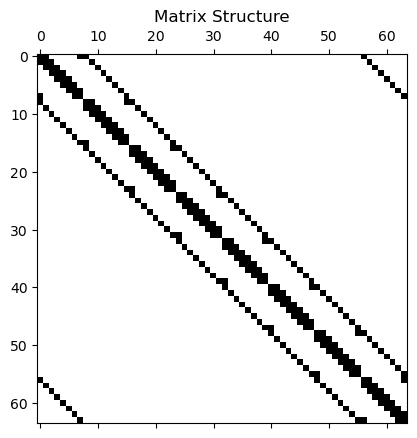

-0.64
0.16
0.16


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

# Parameters
L = 10
n = 8
m = n**2
dx = (2 * L) / n
dy = (2 * L) / n

e0 = np.zeros((m, 1))  # vector of zeros
e1 = np.ones((m, 1))   # vector of ones
e2 = np.copy(e1)    # copy the one vector
e4 = np.copy(e0)    # copy the zero vector

for j in range(1, n+1):
    e2[n*j-1] = 0  # overwrite every n^th value with zero
    e4[n*j-1] = 1  # overwirte every n^th value with one

# Shift to correct positions
e3 = np.zeros_like(e2)
e3[1:m] = e2[0:m-1]
e3[0] = e2[m-1]

e5 = np.zeros_like(e4)
e5[1:m] = e4[0:m-1]
e5[0] = e4[m-1]

# Place diagonal elements
diagonals = [e1.flatten(), e1.flatten(), e5.flatten(), 
             e2.flatten(), -4 * e1.flatten(), e3.flatten(), 
             e4.flatten(), e1.flatten(), e1.flatten()]
offsets = [-(m-n), -n, -n+1, -1, 0, 1, n-1, n, (m-n)]

A = spdiags(diagonals, offsets, m, m).toarray()
A = A / (dx**2)

# Plot matrix structure
plt.figure(5)
plt.spy(A)
plt.title('Matrix Structure')
plt.show()


-0.2


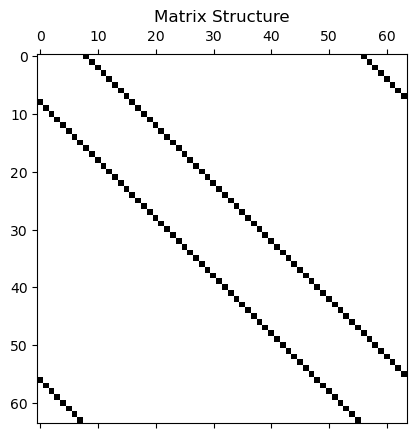

In [51]:
e1 = np.ones((m, 1))   # vector of ones
e2 = np.ones((m, 1))   # vector of ones
e2 = e2 * -1

diagonals = [e1.flatten(), e2.flatten(), e1.flatten(), e2.flatten()]
offsets = [-(m-n), -n, n, (m-n)]

B = spdiags(diagonals, offsets, m, m).toarray()
B = B /(2*dx)
print(B[n,0])
# Plot matrix structure
plt.figure(5)
plt.spy(B)
plt.title('Matrix Structure')
plt.show()

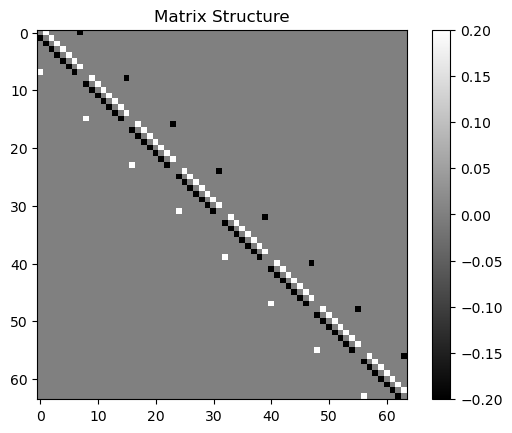

In [75]:
e1 = np.ones((m, 1))   # vector of ones
e2 = np.ones((m, 1))   # vector of ones
e2 = e2 * -1

diagonals = [e2.flatten(), e1.flatten()]
offsets = [-1, 1]

C = spdiags(diagonals, offsets, m, m).toarray()

for i in range(n):
    C[(i+1)*n - 1, i*n] = 1
    C[i*n, (i+1)*n - 1] = -1
    C[i*n, i*n-1] = 0
    C[i*n-1, i*n] = 0

C = C /(2*dy)

# Plot matrix structure
plt.figure(5)
plt.imshow(C, cmap='gray', interpolation='none')
plt.colorbar()
plt.title('Matrix Structure')
plt.show()

In [ ]:
A1 = A
A2 = B
A3 = C